- The game simulates a bunch of cells that live in a colony
- The colony is a two dimensional grid; each cell is a square on the grid
- Each cell is either alive or dead
- Living cells are blue, dead cells are yellow

- Time moves in steps called generations. In each new generation, calls might be born, others survive, and some might die.
- A cell has eight neighbors. The number of living neighbors that a cell has in one generation determines its fate in the next generation.
    - If the cell is alive and has 0 or 1 living neighbors, it dies of exposrue and is dead in the next generation.
    - If the cell is alive and has 4 or more living neighbors, it dies of overcrowding and is dead in the next generation.
    - If the cell is dead and has exactly 3 living neighbors, it is born and is alive in the next generation.
    - Otherwise, the cell stays the same in the next generation as it is in the current generation

In [33]:
import drawsvg as draw

# CONST: cell size
CELL_SIZE = 20 # width and height of each cell in pixels

class Cell:
    # Initialize a new cell
    def __init__(self, row, column):
        self.living = False # bool
        self.x = column * CELL_SIZE
        self.y = row * CELL_SIZE
    
    # Kill this cell
    def kill(self):
        self.living = False

    # Make a cell alive
    def revive(self):
        self.living = True

    # If alive then kill, vice versa
    def flip(self):
        self.living = not self.living

    # Return whether cell is alive
    def is_living(self):
        return self.living

    # Have a cell draw itself:
    def draw(self):
        if self.living == True:
            D.append(draw.Rectangle(self.x, self.y, CELL_SIZE, CELL_SIZE, fill = 'yellow', stroke = 'black'))
        else:
            D.append(draw.Rectangle(self.x, self.y, CELL_SIZE, CELL_SIZE, fill = 'grey', stroke = 'black'))

D = draw.Drawing(400, 400, origin = (0,0))


c1 is living = False


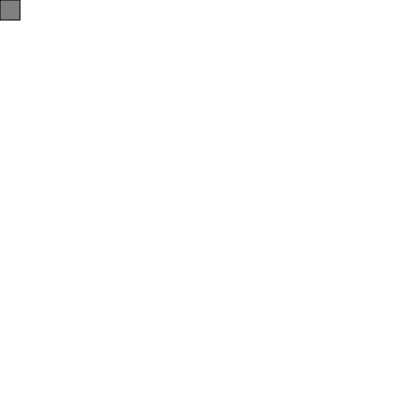

In [34]:
# Driver code
c1 = Cell(0, 0)
c1.draw()
print("c1 is living =", c1.is_living())
D

c1 is living = True


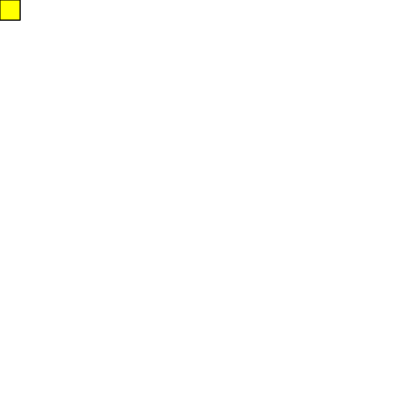

In [35]:
c1.flip()
c1.draw()
print("c1 is living =", c1.is_living())
D

c1 is living = False


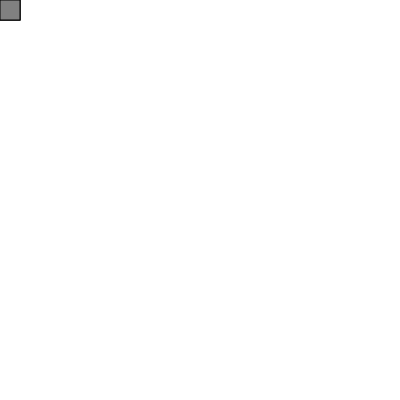

In [36]:
c1.flip()
c1.draw()
print("c1 is living =", c1.is_living())
D

c2 is living = False


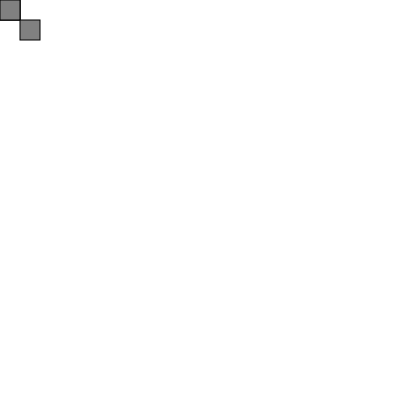

In [37]:
c2 = Cell(1,1)
c2.draw()
print("c2 is living =", c2.is_living())
D

c2 is living = True


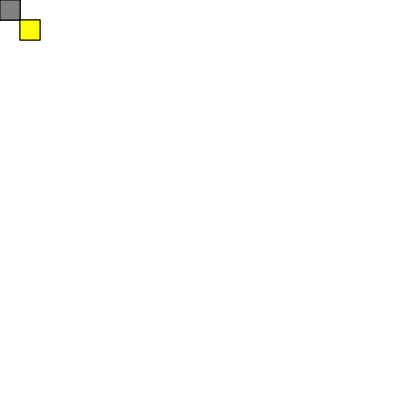

In [38]:
c2.flip()
c2.draw()
print("c2 is living =", c2.is_living())
D

c2 is living = False


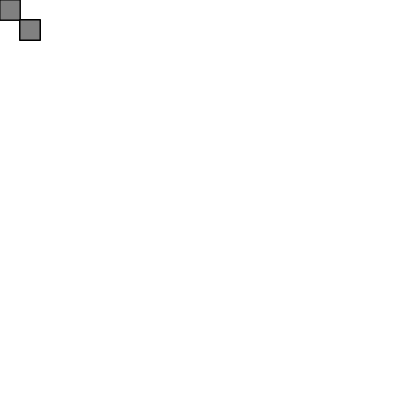

In [44]:
c2.flip()
c2.draw()
print("c2 is living =", c2.is_living())
D

c2 is living = True


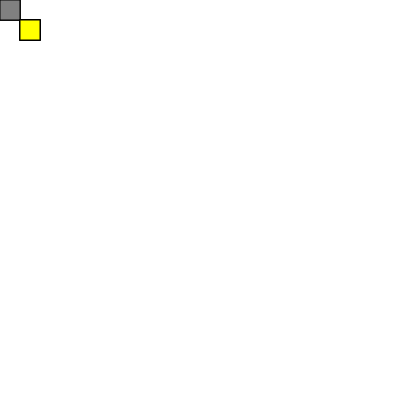

In [45]:
c2.revive()
c2.draw()
print("c2 is living =", c2.is_living())
D

c2 is living = False


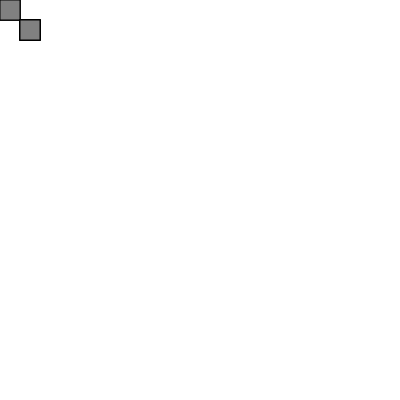

In [46]:
c2.kill()
c2.draw()
print("c2 is living =", c2.is_living())
D

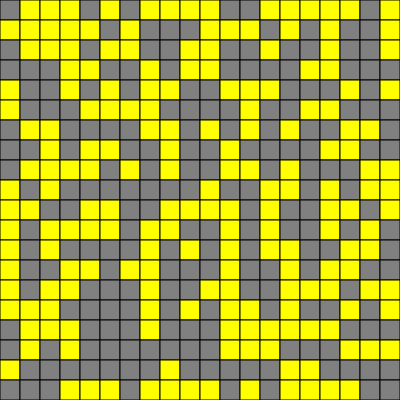

In [52]:
import random

for x in range(0, 20):
    for y in range (0, 20):
        c = Cell(x, y)
        if(random.uniform(0, 1) < 0.5):
            c.revive()
        c.draw()
D

In [54]:
class Colony:
    # create a colony with specified rows and columns
    def __init__(self, rows, columns):
        # Remember the number of rows and columns
        self.rows = rows
        self.columns = columns

        # Create cells as a reference to a list of refereneces to rows
        self.cells = []

        # Append each row:
        for row in range(rows):
            self.cells.append([]) # start with an empty row

            # Append each column to the row
            for column in range(columns):
                self.cells[row].append(Cell(row, column))
                if(random.uniform(0, 1) < 0.5):
                    self.cells[row][column].flip() # randomly bring some cells to life

    # Draw a colony of cells
    def draw(self):
        # Draw each row of cells
        for row in range(self.rows):
            # Have each cell in this row draw itself
            for column in range(self.columns):
                self.cells[row][column].draw()
    
    # Compute the next generation of cells
    def compute_generation(self):
        # Initialize a lisyt of lists of counts of liiving neighbors
        living_neighbors = []
        for row in range(self.rows):
            living_neighbors.append([0]  * self.columns)
        # Go through the entire colony, incrementing the living neighbor count of each neighbor of each living cell
        for row in range(self.rows):
            for column in range(self.columns):
                if self.cells[row][column].is_living():
                    # Living, so increment:
                    row_above = (row - 1) % self.rows
                    row_below = (row + 1) % self.rows
                    column_left = (column - 1) % self.columns
                    column_right = (column + 1) % self.columns
                    living_neighbors[row_above][column_left] += 1
                    living_neighbors[row_above][column] += 1
                    living_neighbors[row_above][column_right] += 1
                    living_neighbors[row][column_left] += 1
                    living_neighbors[row][column_right] += 1
                    living_neighbors[row_below][column_left] += 1
                    living_neighbors[row_below][column] += 1
                    living_neighbors[row_below][column_right] += 1
        
        # Now go back through the entire colony, killing cells with too few or too many living neighbors, and making cells with 3 liiving neighbors be alive
        for row in range(self.rows):
            for column in range(self.columns):
                if(living_neighbors[row][column] <= 1) or (living_neighbors[row][column] >= 4):
                    self.cells[row][column].kill()
                elif living_neighbors[row][column] == 3:
                    self.cells[row][column].revive()

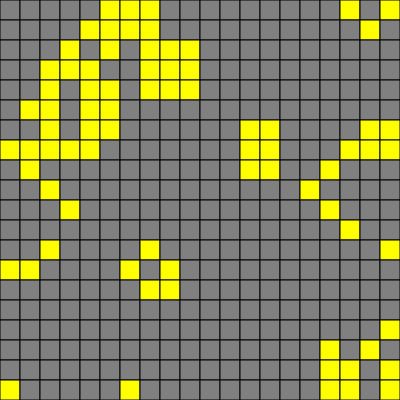

In [56]:
# Play the game of life
def draw_frame():
    hive.compute_generation()
    hive.draw()
    return D

hive = Colony(20, 20) # build initial colony

for i in range(0, 100):
    D = draw.Drawing(400, 400, origin = (0,0))

    with draw.frame_animate_jupyter(draw_frame, delay = 0.5) as anim:
        anim.draw_frame()